In [425]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [426]:
df = pd.read_csv("final_scout_not_get_dummy.csv")

In [427]:
df.head()

,make_model,km,Type,Fuel,Gears,Comfort_Convenience,Entertaintment_Media,Extras,Safety_Security,Body_Type,Price,Vat,Age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_Type,Gearing_Type,Displacement_cc,Weight_kg,Drive_Chain,Cons_Comb,CO2_Emission
0,Audi A1,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,15770,VAT deductible,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.000,99.000
1,Audi A1,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Sedans,14500,Price negotiable,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.000,129.000
2,Audi A1,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,14640,VAT deductible,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.000,99.000
3,Audi A1,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Sedans,14500,VAT deductible,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.000,99.000
4,Audi A1,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Sedans,16790,VAT deductible,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.000,109.000


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            15914 non-null  object 
 1   km                    15914 non-null  float64
 2   Type                  15914 non-null  object 
 3   Fuel                  15914 non-null  object 
 4   Gears                 15914 non-null  float64
 5   Comfort_Convenience   15914 non-null  object 
 6   Entertaintment_Media  15914 non-null  object 
 7   Extras                15914 non-null  object 
 8   Safety_Security       15914 non-null  object 
 9   Body_Type             15914 non-null  object 
 10  Price                 15914 non-null  int64  
 11  Vat                   15914 non-null  object 
 12  Age                   15914 non-null  float64
 13  Previous_Owners       15914 non-null  float64
 14  hp_kW                 15914 non-null  float64
 15  Inspection_new     

In [429]:
df.describe()

,km,Gears,Price,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission
count,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000
mean,32090.368,5.937,18023.741,1.390,1.043,88.500,0.247,1428.651,1337.713,4.331,118.326
std,36978.347,0.705,7381.470,1.121,0.338,26.675,0.431,275.810,199.682,0.881,17.154
min,0.000,5.000,4950.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000,80.000
25%,1919.250,5.000,12850.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.000,105.000
50%,20411.500,6.000,16900.000,1.000,1.000,85.000,0.000,1461.000,1296.500,4.000,117.000
75%,46900.000,6.000,21900.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.000,129.000
max,317000.000,8.000,74600.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.000,253.000


In [430]:
df.isnull().sum()

make_model              0
km                      0
Type                    0
Fuel                    0
Gears                   0
Comfort_Convenience     0
Entertaintment_Media    0
Extras                  0
Safety_Security         0
Body_Type               0
Price                   0
Vat                     0
Age                     0
Previous_Owners         0
hp_kW                   0
Inspection_new          0
Paint_Type              0
Upholstery_Type         0
Gearing_Type            0
Displacement_cc         0
Weight_kg               0
Drive_Chain             0
Cons_Comb               0
CO2_Emission            0
dtype: int64

In [431]:
df.make_model

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15909    Renault Espace
15910    Renault Espace
15911    Renault Espace
15912    Renault Espace
15913    Renault Espace
Name: make_model, Length: 15914, dtype: object

In [432]:
df2=df.copy()

### Feature Engineering

In [433]:
df_object=df.select_dtypes(include="object").head()
df_object

,make_model,Type,Fuel,Comfort_Convenience,Entertaintment_Media,Extras,Safety_Security,Body_Type,Vat,Paint_Type,Upholstery_Type,Gearing_Type,Drive_Chain
0,Audi A1,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
1,Audi A1,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Sedans,Price negotiable,Metallic,Cloth,Automatic,front
2,Audi A1,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
3,Audi A1,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front
4,Audi A1,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Sedans,VAT deductible,Metallic,Cloth,Automatic,front


In [434]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 8
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertaintment_Media: 346
Extras              : 659
Safety_Security     : 4442
Body_Type           : 8
Vat                 : 2
Paint_Type          : 3
Upholstery_Type     : 2
Gearing_Type        : 3
Drive_Chain         : 3


In [435]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

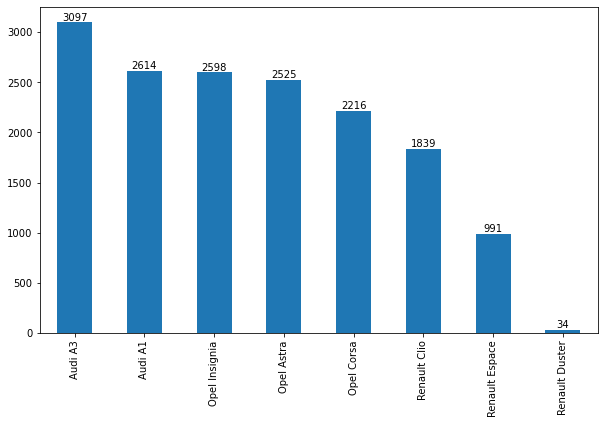

In [436]:
ax=df.make_model.value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0]);

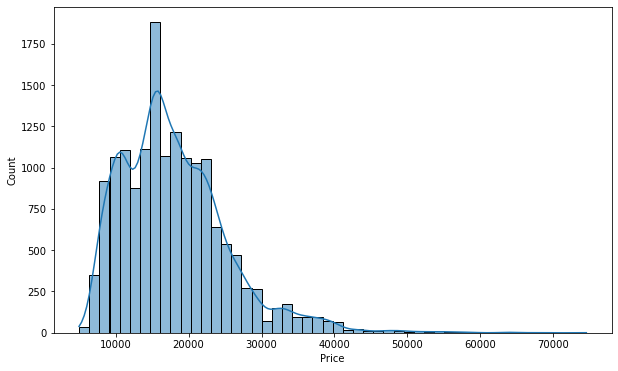

In [437]:
sns.histplot(df.Price,bins=50,kde=True);

In [438]:
skew(df.Price) #0 a eşitse dağılım simetrik ,0 dan büyükse sağa çarpık ,0 dan küçükse sola çarpık 

1.236330745564795

In [439]:
df_numeric=df.select_dtypes(include="number")
df_numeric

,km,Gears,Price,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission
0,56013.000,7.000,15770,3.000,2.000,66.000,1,1422.000,1220.000,3.000,99.000
1,80000.000,7.000,14500,2.000,1.000,141.000,0,1798.000,1255.000,5.000,129.000
2,83450.000,7.000,14640,3.000,1.000,85.000,0,1598.000,1135.000,3.000,99.000
3,73000.000,6.000,14500,3.000,1.000,66.000,0,1422.000,1195.000,3.000,99.000
4,16200.000,7.000,16790,3.000,1.000,66.000,1,1422.000,1135.000,4.000,109.000
...,...,...,...,...,...,...,...,...,...,...,...
15909,1647.363,6.000,39950,0.000,1.000,147.000,0,1997.000,1758.000,5.000,139.000
15910,9900.000,7.000,39885,0.000,1.000,165.000,0,1798.000,1708.000,7.000,168.000
15911,15.000,6.000,39875,0.000,1.000,146.000,1,1997.000,1734.000,5.000,139.000
15912,10.000,6.000,39700,0.000,1.000,147.000,0,1997.000,1758.000,5.000,139.000


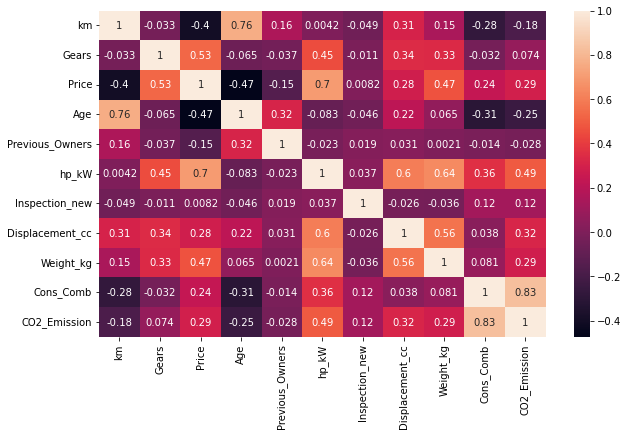

In [440]:
sns.heatmap(df_numeric.corr(),annot=True);

### multicollinearity control

In [441]:
df_numeric.corr()[(df_numeric.corr()>=90)&(df_numeric.corr()<1)].any().any()

False

In [442]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

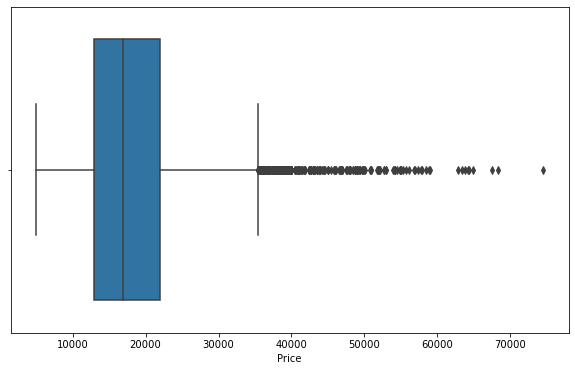

In [443]:
sns.boxplot(df.Price);

In [444]:
df.columns

Index(['make_model', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain', 'Cons_Comb', 'CO2_Emission'],
      dtype='object')

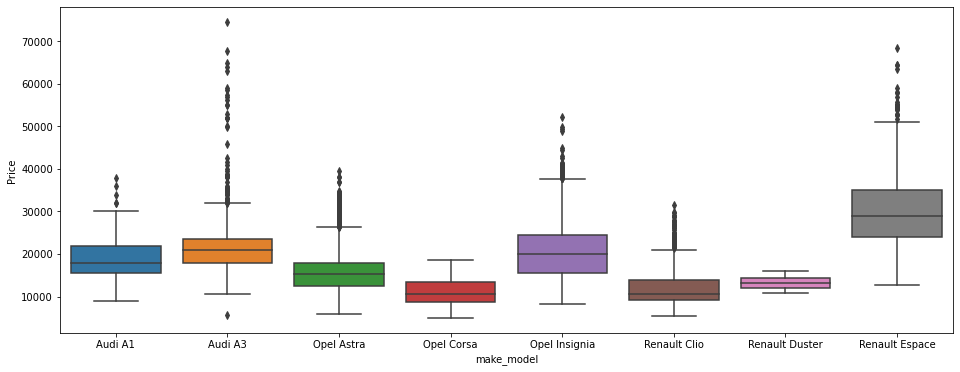

In [445]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model",y="Price",data=df,whis=1.5)
plt.show();

In [446]:
df[df["make_model"]=="Audi A1"]["Price"]

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: Price, Length: 2614, dtype: int64

In [447]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["Price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# Her bir unique değerdeki outlier sayısı ve oranı

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


### 2. Data Pre-Processing

### Train | Test Split

In [448]:
X= df.drop(columns="Price")
y= df.Price

In [449]:
df.columns

Index(['make_model', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain', 'Cons_Comb', 'CO2_Emission'],
      dtype='object')

In [450]:
def trans_1(X, y, test_size = 0.2, random_state=101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train = X_train.join(X_train["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["Entertaintment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    
    X_test = X_test.join(X_test["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["Entertaintment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    
    X_train.drop(columns=["Comfort_Convenience","Entertaintment_Media","Extras","Safety_Security"], inplace = True)
    X_test.drop(columns=["Comfort_Convenience","Entertaintment_Media","Extras","Safety_Security"], inplace = True)
    
    
    return X_train, X_test, y_train, y_test

In [451]:
X_train, X_test, y_train, y_test = trans_1(X, y)

In [452]:
X_train.head()

,make_model,km,Type,Fuel,Gears,Body_Type,Vat,Age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_Type,Gearing_Type,Displacement_cc,Weight_kg,Drive_Chain,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,Opel Insignia,79640.000,Used,Diesel,6.000,Station wagon,VAT deductible,2.000,1.000,125.000,0,Metallic,Cloth,Manual,1956.000,1733.000,front,4.000,119.000,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,Opel Corsa,129617.000,Used,Diesel,5.000,Sedans,VAT deductible,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1398.000,1163.000,front,5.000,124.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,Opel Insignia,16300.000,Used,Diesel,6.000,Sedans,VAT deductible,2.000,1.000,100.000,1,Metallic,Cloth,Manual,1598.000,1503.000,front,4.000,126.000,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7601,Opel Astra,10350.000,Demonstration,Diesel,6.000,Station wagon,VAT deductible,0.000,1.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1536.000,front,5.000,134.000,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4209,Audi A3,26450.000,Used,Diesel,6.000,Station wagon,VAT deductible,2.000,1.000,81.000,0,Metallic,Cloth,Manual,1598.000,1365.000,front,3.600,107.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1


### OneHotEncoder

### OneHotEncoder for X_train and X_test

In [453]:
# Orion Hoca
    # get dummy pandas
    # one hot encoder =sklearn.
# Class chat: one hot encoder ın get dummy den bir farkı var mı?
    # Johnson Hoca: OneHotEncoder içindeki drop hyperparametresini none yerine drop olarak değiştirirseniz fazla feature ignore eder.

In [454]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [455]:
cat = X_train.select_dtypes("object").columns
cat
 # train üzerinden onehotencoder yapacağız. O yüzden traindeki kategorik sütunları çağırıyoruz

Index(['make_model', 'Type', 'Fuel', 'Body_Type', 'Vat', 'Paint_Type',
       'Upholstery_Type', 'Gearing_Type', 'Drive_Chain'],
      dtype='object')

In [456]:
cat = list(cat) # Bunları listeye çevirelim
cat 

['make_model',
 'Type',
 'Fuel',
 'Body_Type',
 'Vat',
 'Paint_Type',
 'Upholstery_Type',
 'Gearing_Type',
 'Drive_Chain']

In [457]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names(cat))
# OneHotEncoder fonk. kullanalım
# enc.fit_transform(X_train[cat] : encoder tanımlayıp fit_transfotm yapıyorum
# index = X_train.index : sıra karışmasın diye train in indexsini veriyoruz 

In [458]:
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names(cat))
X_train_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
7601,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
4209,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [459]:
X_train.select_dtypes("number") # Nümerik featurelarımız

,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,79640.000,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.000,119.000,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,129617.000,5.000,3.000,1.000,55.000,0,1398.000,1163.000,5.000,124.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,16300.000,6.000,2.000,1.000,100.000,1,1598.000,1503.000,4.000,126.000,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7601,10350.000,6.000,0.000,1.000,100.000,1,1598.000,1536.000,5.000,134.000,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4209,26450.000,6.000,2.000,1.000,81.000,0,1598.000,1365.000,3.600,107.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,1647.363,6.000,0.000,1.000,85.000,0,999.000,1180.000,4.000,106.000,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,

In [460]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new # x_train kategorikleri ile  x_train nümeriklerini birleştirdik
# X_train datamız oluştu. Bunu test içinde yapacağız

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,79640.000,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.000,119.000,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,129617.000,5.000,3.000,1.000,55.000,0,1398.000,1163.000,5.000,124.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,16300.

In [461]:
X_train_new # Hepsi sayısal değer. Modele sokmaya hazır

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,79640.000,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.000,119.000,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,129617.000,5.000,3.000,1.000,55.000,0,1398.000,1163.000,5.000,124.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,16300.

In [462]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names(cat))
X_test_cat
# Encoder ı transform olarak çağırıyoruz burada(enc.transform(X_test[cat])
# Sonuç olarak Data leakage in önüne geçmiş olduk

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
2667,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
12667,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
12698,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
7490,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4944,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000


In [463]:
X_test.select_dtypes("number") # X_test nümerik sütunlar

,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15078,49606.000,6.000,2.000,2.000,147.000,0,1618.000,1734.000,6.000,153.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13096,100.000,6.000,1.000,1.000,88.000,1,1197.000,1087.000,5.000,120.000,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11348,11000.000,6.000,1.000,1.000,121.000,1,1490.000,1503.000,5.200,133.000,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2667,58000.000,7.000,3.000,1.000,81.000,0,1598.000,1365.000,3.000,98.000,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1
12667,7.000,6.000,0.000,1.000,121.000,0,1490.000,1522.000,6.000,149.000,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,3500.000,5.000,0.000,1.000,66.000,0,1398.000,1163.000,5.000,129.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,

In [464]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new 
# # X_test kategorik ve nümerik sütunlarını birleştiriyoruz
# Test datamızda oluştu

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,49606.000,6.000,2.000,2.000,147.000,0,1618.000,1734.000,6.000,153.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,100.000,6.000,1.000,1.000,88.000,1,1197.000,1087.000,5.000,120.000,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,11000.00

In [465]:
def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    
    return X_train, X_test

In [466]:
X_train, X_test = trans_2(X_train, X_test) # Tek satırda X_train ve X_test onehotencoder uygulanmış datam döndü

In [467]:
X_train.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11612,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,79640.000,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.000,119.000,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9039,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,129617.000,5.000,3.000,1.000,55.000,0,1398.000,1163.000,5.000,124.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11638,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,16300.

In [468]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,49606.000,6.000,2.000,2.000,147.000,0,1618.000,1734.000,6.000,153.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13096,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,100.000,6.000,1.000,1.000,88.000,1,1197.000,1087.000,5.000,120.000,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11348,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,11000.00

In [469]:
corr_by_price = X_train.join(y_train).corr()["Price"].sort_values()[:-1]
corr_by_price

Age                                        -0.478
Gearing_Type_Manual                        -0.433
km                                         -0.404
Upholstery_Type_Cloth                      -0.388
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.372
make_model_Renault Clio                    -0.295
Body_Type_Compact                          -0.196
Drive_Chain_front                          -0.160
Previous_Owners                            -0.146
make_model_Opel Astra                      -0.130
em_CD player                               -0.094
Vat_Price negotiable                       -0.093
em_On-board computer                       -0.078
ss_Central door lock with remote control   -0.072
Paint_Type_Perl effect                     -0.059
ss_Fog lights                              -0.055
Body_Type_Sedans                           -0.049
ss_Central door lock                       -0.045
ss_Isofix                                  -0.040


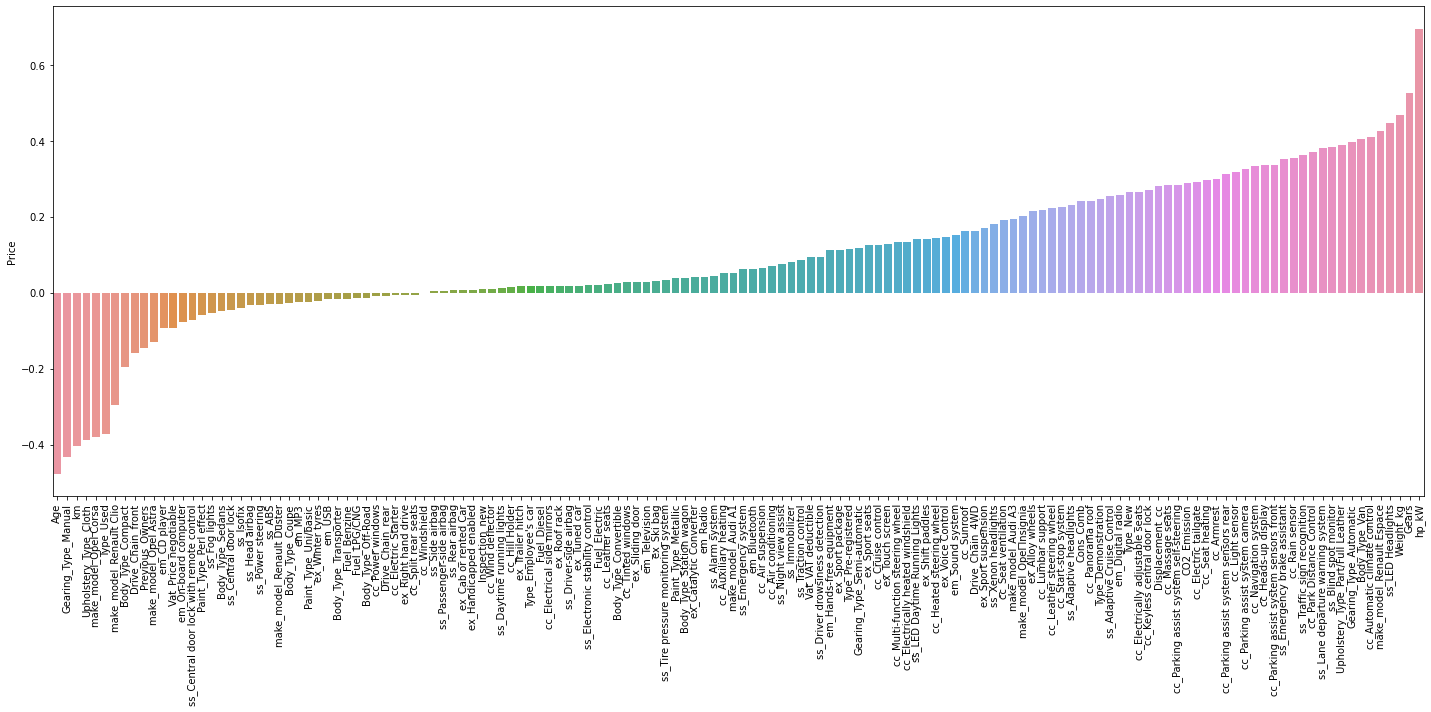

In [470]:
# Üstteki corr bilgisini görselleştirelim
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

### 3. Implement Linear Regression

Import the modul

Fit the model

Predict the test set

Determine feature coefficiant

Evaluate model performance (use performance metrics for regression and cross_val_score)

Compare different evaluation metrics

In [471]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [472]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [473]:
pd.options.display.float_format = '{:.3f}'.format # Sonuçlarda virgülden sonra 3 hane gelmesi için kod
# Environment settings: 
    # pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [474]:
train_val(lm, X_train, y_train, X_test, y_test)


,train,test
R2,0.890,0.890
mae,1707.011,1710.320
mse,6019915.116,5792630.655
rmse,2453.552,2406.788


### Adjusted R2 Score

In [475]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [476]:
y_pred = lm.predict(X_test)

In [477]:
adj_r2(y_test, y_pred, X) # Karşılaştırdığımızda skorlarımız tutarlı
# Yani artan feature sayımı datam kaldırabiliyor

0.8901934103361053

### Cross Validate

In [478]:
model = LinearRegression() # normalize=True
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [479]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.077,0.009,0.887,-1672.120,-5435379.819,-2331.390
1,0.077,0.006,0.884,-1775.053,-6231786.254,-2496.355
2,0.065,0.005,0.890,-1741.579,-6083258.660,-2466.426
3,0.067,0.007,0.883,-1740.366,-6927674.552,-2632.048
4,0.065,0.005,0.890,-1741.044,-6440213.904,-2537.758
5,0.064,0.006,0.886,-1729.923,-6460249.568,-2541.702
6,0.061,0.005,0.887,-1738.439,-5858245.825,-2420.381
7,0.060,0.006,0.902,-1679.163,-5500156.386,-2345.241
8,0.074,0.008,0.875,-1755.007,-7209928.331,-2685.131
9,0.094,0.008,0.881,-1741.631,-6168683.837,-2483.684


In [480]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1731.433
test_neg_mean_squared_error        -6231557.714
test_neg_root_mean_squared_error      -2494.012
dtype: float64

In [481]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1707.011,1710.320
mse,6019915.116,5792630.655
rmse,2453.552,2406.788


In [482]:
2406/df.Price.mean() # Hatalarımızın oransal değeri. price ı yüzde 13 hata ile tahmin edebiliyoruz

0.13349059871275518

### Residual Plot

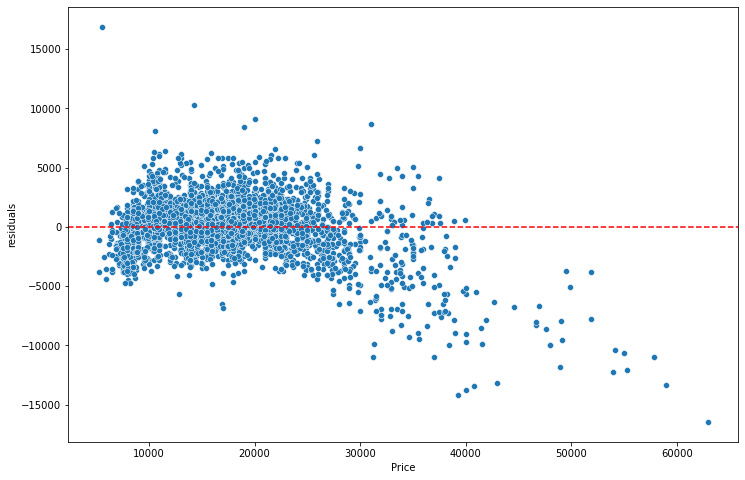

In [483]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()
# Hatalarımızın dağımında normal dağılım olduğunu görüyoruz genelde
# Tam anlaşılması için kdeplot a bakalım

<AxesSubplot:xlabel='Price', ylabel='Density'>

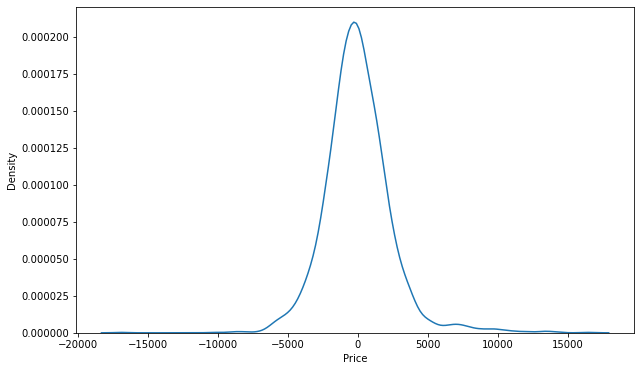

In [484]:
sns.kdeplot(residuals) # Normal dağılım olduğunu görüyoruz

In [485]:
skew(residuals) # skew e bakarsak bu skordanda residual lerin normal dağılım sergilediğini görüyoruz

0.8792583660085829

### Dropping outliers that worsen my predictions from the dataset

In [486]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["Price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
df2

# Outlier içeren indexleri drop edelim. Bunu make_model bazında yapacağız

,make_model,km,Type,Fuel,Gears,Comfort_Convenience,Entertaintment_Media,Extras,Safety_Security,Body_Type,Price,Vat,Age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_Type,Gearing_Type,Displacement_cc,Weight_kg,Drive_Chain,Cons_Comb,CO2_Emission
0,Audi A1,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,15770,VAT deductible,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.000,99.000
1,Audi A1,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Sedans,14500,Price negotiable,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.000,129.000
2,Audi A1,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Sedans,14640,VAT deductible,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.000,99.000
3,Audi A1,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Sedans,14500,VAT deductible,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.000,99.000
4,Audi A1,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Sedans,16790,VAT deductible,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.000,109.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,Renault Espace,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Van,39950,VAT deductible,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.000,139.000
15910,Renault Espace,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",Van,39885,VAT deductible,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.000,168.000
15911,Renault Espace,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",Van,39875,VAT deductible,0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.000,139.000
15912,Renault Espace,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Van,39700,VAT deductible,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.000,139.000


In [487]:
df3 = df2.copy()  # df3 ü feature selection aşamasında kullanacağımız için df2 nin kopyasını bir değişkene ekledik

In [488]:
# Outlier drop edilmiş df ile çalışalım
X = df2.drop(columns = "Price")
y = df2.Price

X_train, X_test, y_train, y_test = trans_1(X, y) # Araba özelliklerini get_dummy yapmıştık
X_train, X_test = trans_2(X_train, X_test)       # trans_2 ile onehotencoder yapmış olduk

In [489]:
X_train.head() # Datamız modellemeye hazır

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
10059,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,10.000,6.000,0.000,1.000,66.000,0,1398.000,1163.000,6.000,143.000,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3436,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,54000.000,7.000,3.000,1.000,81.000,0,1598.000,1360.000,3.000,99.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3815,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,39246.000,7.0

In [490]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Body_Type_Compact,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_Price negotiable,Vat_VAT deductible,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,km,Gears,Age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,Cons_Comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
9817,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,24487.000,5.000,1.000,2.000,51.000,0,1229.000,1163.000,5.000,126.000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0
14581,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,500.000,5.000,0.000,2.000,56.000,0,898.000,1165.000,4.200,119.000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0
13226,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,24473.000,6

In [491]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

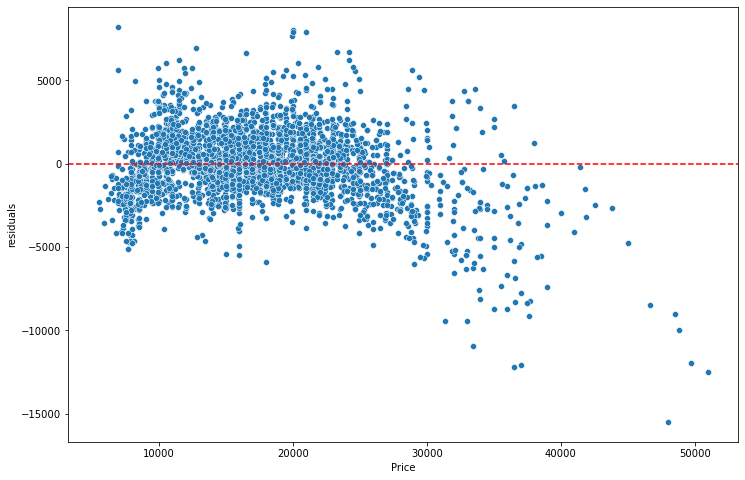

In [492]:
plt.figure(figsize=(12,8))
y_pred = lm2.predict(X_test)
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [493]:
train_val(lm2, X_train, y_train, X_test, y_test)
# Skorlarımız artmış oldu
# Hatamız da düşmüş

,train,test
R2,0.903,0.901
mae,1519.012,1482.490
mse,4522141.881,4207434.513
rmse,2126.533,2051.203


In [494]:
2051/df2.Price.mean() # Önceki hatamıza göre oransal hatamızda düştü

0.11667752693057551

In [495]:
2405/df.Price.mean() # Eski hatamız

0.13343511633590033

In [496]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [497]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.890,-1559.439,-4651940.393,-2156.836
2,0.905,-1501.178,-4358718.291,-2087.754
3,0.900,-1596.003,-4870435.257,-2206.906
4,0.902,-1520.495,-4704575.126,-2169.003
5,0.887,-1604.767,-5249484.538,-2291.175
6,0.907,-1549.063,-4669981.647,-2161.014
7,0.903,-1468.685,-4284718.721,-2069.956
8,0.902,-1535.376,-4783937.068,-2187.221
9,0.903,-1485.720,-4445902.851,-2108.531
10,0.898,-1579.354,-4599837.838,-2144.723


In [498]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1540.008
test_neg_mean_squared_error        -4661953.173
test_neg_root_mean_squared_error      -2158.312
dtype: float64

In [499]:
train_val(lm2, X_train, y_train, X_test, y_test) # cv den sonra skorların tutarlı olduğunu görüyoruz

,train,test
R2,0.903,0.901
mae,1519.012,1482.490
mse,4522141.881,4207434.513
rmse,2126.533,2051.203


In [500]:
# Görselleştirme için değerlerimizi tanımlayalım
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [501]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [502]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
9714,9900,11795.296,-1895.296
13737,6900,4658.156,2241.844
15648,34989,37682.123,-2693.123
9229,8450,6948.562,1501.438
13536,7999,4054.817,3944.183
173,17500,16326.752,1173.248
10857,11490,14816.085,-3326.085
11506,18900,19880.408,-980.408
4575,23400,24450.098,-1050.098
10994,13390,13150.801,239.199


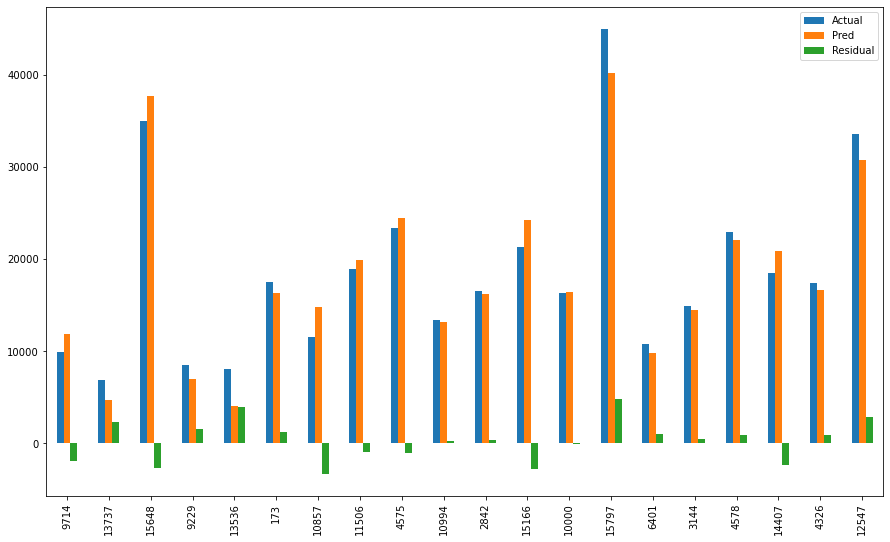

In [503]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [504]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")
# Outlierların olmadığı coefficientlarımız
# Bunu daha sağlıklı yorumlamak için scaling yapılmalı

,Coef
make_model_Renault Duster,-7584.846
make_model_Opel Corsa,-3182.774
make_model_Renault Clio,-3132.544
Age,-1610.751
Gearing_Type_Manual,-1573.234
Drive_Chain_rear,-1410.703
make_model_Opel Astra,-1299.605
Body_Type_Convertible,-1233.129
Body_Type_Transporter,-1114.975
Type_Employee's car,-1053.295


In [505]:
# LineerRegression ın arkasında OLS metodu
# Ridge ve Lassoda gradient descent metodu çalışıyor

In [506]:
# Orion Hoca:
    # bütün modellere bakmadık, daha bunun DT var RF i var boosting methodları var
    # onlard bu outlierları atmaya gerek kalmayacak
    # illa linear lasso ridge diyorsanız da datayı bölerek iki model kurabilirsiniz
    # bellii fiyatın üzerine bir model altına başka bir model
    # ya da marka bazında bir model vesaire vesaire
    # seçenek çok
    # yeterki modelin öğrenebileceği kadar sample olsun

### 4. Implement Ridge Regression

### Scaling

In [507]:
scaler = MinMaxScaler()   # dummy featurelar çok olduğu için MinMaxScaler() kullanmak mantıklı
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge 

In [508]:
from sklearn.linear_model import Ridge

In [509]:
ridge_model = Ridge()

In [510]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [511]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.503,1482.149
mse,4523405.402,4204297.111
rmse,2126.830,2050.438


### Cross Validation

In [512]:
model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10)

In [513]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
# Skorlar birbirine yakın(öncekiyle). Yani tutarlı

test_r2                                   0.900
test_neg_mean_absolute_error          -1538.584
test_neg_mean_squared_error        -4658759.558
test_neg_root_mean_squared_error      -2157.554
dtype: float64

### Finding best alpha for Ridge

In [514]:
from sklearn.model_selection import GridSearchCV # RidgeCV yerine bu gün GridSearchCV kullanalım

In [515]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [516]:
ridge_model = Ridge()

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
#  n_jobs = -1: işlemcileri çalıştırmak için yazılan parametre

In [517]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [518]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [519]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.256,0.119,0.005,0.006,0.010,{'alpha': 0.01},-2156.816,-2087.737,-2206.903,-2169.014,-2291.190,-2161.005,-2069.938,-2187.163,-2108.515,-2144.655,-2158.294,60.358,3
1,0.119,0.014,0.003,0.003,1.020,{'alpha': 1.02},-2155.397,-2086.623,-2206.946,-2170.689,-2292.918,-2160.679,-2068.887,-2183.258,-2108.001,-2142.133,-2157.553,60.989,1
2,0.149,0.033,0.003,0.001,2.030,{'alpha': 2.03},-2154.761,-2086.464,-2207.442,-2172.730,-2294.992,-2161.140,-2068.734,-2181.140,-2108.478,-2142.559,-2157.844,61.450,2
3,0.157,0.054,0.003,0.001,3.040,{'alpha': 3.04},-2154.648,-2086.906,-2208.228,-2174.857,-2297.276,-2162.051,-2069.037,-2179.880,-2109.372,-2143.888,-2158.614,61.838,4
4,0.168,0.034,0.006,0.011,4.050,{'alpha': 4.05},-2154.909,-2087.754,-2209.222,-2177.017,-2299.694,-2163.245,-2069.628,-2179.176,-2110.514,-2145.643,-2159.680,62.186,5
5,0.151,0.027,0.006,0.012,5.060,{'alpha': 5.06},-2155.444,-2088.890,-2210.372,-2179.191,-2302.199,-2164.627,-2070.418,-2178.868,-2111.821,-2147.629,-2160.946,62.507,6
6,0.186,0.058,0.003,0.001,6.070,{'alpha': 6.07},-2156.188,-2090.234,-2211.642,-2181.368,-2304.762,-2166.138,-2071.355,-2178.856,-2113.242,-2149.743,-2162.353,62.808,7
7,0.196,0.051,0.003,0.002,7.080,{'alpha': 7.08},-2157.093,-2091.733,-2213.003,-2183.541,-2307.361,-2167.742,-2072.401,-2179.072,-2114.747,-2151.930,-2163.862,63.094,8
8,0.168,0.030,0.003,0.001,8.090,{'alpha': 8.09},-2158.124,-2093.346,-2214.437,-2185.706,-2309.980,-2169.413,-2073.532,-2179.467,-2116.309,-2154.153,-2165.447,63.368,9
9,0.149,0.018,0.003,0.003,9.100,{'alpha': 9.1},-2159.252,-2095.046,-2215.927,-2187.858,-2312.607,-2171.132,-2074.726,-2180.004,-2117.913,-2156.390,-2167.085,63.632,10


In [520]:
ridge_grid_model.best_index_

1

In [365]:
ridge_grid_model.best_score_ # minimize edilmiş RMSE

-2157.5530169832637

In [366]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.497,1482.147
mse,4523451.854,4204268.281
rmse,2126.841,2050.431


In [367]:
# Skorlarımızı alalım karşılaştırma için kullanacağız
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [368]:
ridge = Ridge(alpha=1.02).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10878.448
make_model_Renault Duster,-6831.623
Age,-4868.901
make_model_Opel Corsa,-3332.833
make_model_Renault Clio,-3238.122
Gearing_Type_Manual,-1582.598
Weight_kg,-1560.085
CO2_Emission,-1489.105
make_model_Opel Astra,-1388.993
Drive_Chain_rear,-1190.375


### 5. Implement Lasso Regression

In [521]:
from sklearn.linear_model import Lasso

In [522]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train) # alpha=1

Lasso()

In [523]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1519.267,1481.902
mse,4534647.785,4205660.646
rmse,2129.471,2050.771


### Cross Validation

In [524]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [525]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
# Skorlar tutarlı

test_r2                                   0.900
test_neg_mean_absolute_error          -1537.169
test_neg_mean_squared_error        -4654403.772
test_neg_root_mean_squared_error      -2156.537
dtype: float64

### Finding best alpha for Lasso

In [526]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [527]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [528]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [529]:
lasso_grid_model.best_score_ 

-2156.5563805005722

In [530]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Default halinde alınan skorlarla aynı gibi.
# Virgülden sonra 3 basamak almıştık. Daha fazla alırsak fark olduğunu görebiliriz
# ridge lasso kullanınca;
    # train tes skorlarını yaklaştırmak
    # overfitting i çözmek
    # multicollinearity yi halletmek
# .. işlemleri hallediliyor

,train,test
R2,0.903,0.901
mae,1519.297,1481.956
mse,4534958.286,4205979.116
rmse,2129.544,2050.848


In [531]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [532]:
lasso = Lasso(alpha=1.02).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")
# Lasso bazı featureları atmış(0 yapmış katsayısını)
# Class chat soru : Peki teorik olarak belli değişkenler bizim için önemliyse lasso'nun kendi belirlediği faktörleri 0'laması sorun olmaz mı hocam? Şu değişken kalsın, multicollinearity halinde olduğu diğer değişkeni at diyebiliyor muyuz?
# Orion hoca: diyemiyoruz. o kendi karar verir.ama siz modele sokmadan datayı ayarlayabilirisiniz.herşeyide ML den beklemeyelim.o da gariban bir kütüphane

,Coef
km,-10843.370
make_model_Renault Duster,-6131.605
Age,-4871.154
make_model_Opel Corsa,-3453.464
make_model_Renault Clio,-3321.336
make_model_Opel Astra,-1535.655
Gearing_Type_Manual,-1532.982
Weight_kg,-1183.345
Body_Type_Transporter,-953.789
CO2_Emission,-696.810


### 6. Implement Elastic-Net

In [533]:
from sklearn.linear_model import ElasticNet

In [534]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled,y_train) # l1_ratio:0.5, alpha:1

ElasticNet()

In [535]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)
# underfitting durumunu söyleyebiliriz
# Skor çok düşük, hata çok yüksek
# Teyit için CV yapalım

,train,test
R2,0.626,0.642
mae,3143.197,2973.019
mse,17414014.785,15219910.842
rmse,4173.010,3901.270


### Cross Validation

In [536]:
model = ElasticNet()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10)
# Skorlar tutarlı ama yukardaki modellerle kıyaslandığında underfitting durumu var.

In [537]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.624
test_neg_mean_absolute_error           -3148.704
test_neg_mean_squared_error        -17479747.712
test_neg_root_mean_squared_error       -4178.540
dtype: float64

### Finding best alpha and l1_ratio for ElasticNet

In [538]:
elastic_model = ElasticNet()

In [539]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

# class chat soru: Hocam buradaki alphaları neye göre belirlediniz?
# Orion hoca: daha önceden denedi, o yüzden son halini görüyorsunuz.denemeleri burada yapmamak için

In [540]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [541]:
elastic_grid_model.best_params_
# 'l1_ratio': 1 : Lasso

{'alpha': 1.02, 'l1_ratio': 1}

In [542]:
elastic_grid_model.best_score_

-2156.5563805005722

In [543]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1519.297,1481.956
mse,4534958.286,4205979.116
rmse,2129.544,2050.848


In [544]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Feature İmportance

In [545]:
df3.columns

Index(['make_model', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain', 'Cons_Comb', 'CO2_Emission'],
      dtype='object')

In [546]:
df_new = df3[["make_model", "hp_kW", "km","Age", "Price", "Gearing_Type", "Gears"]]
# Get_dummy yapmadığım dataframeden(df3) feature selection yapıyorum
# Bunlarla yeni model oluşturacağız
# Acaba 6 tane feature kullansak(target/label hariç) güzel bir skor alabilir miyiz diye deniyoruz
# 2 tane kategorik sütunum var. Bunlara onehotencoder yapacağız

In [547]:
df_new

,make_model,hp_kW,km,Age,Price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000
...,...,...,...,...,...,...,...
15909,Renault Espace,147.000,1647.363,0.000,39950,Automatic,6.000
15910,Renault Espace,165.000,9900.000,0.000,39885,Automatic,7.000
15911,Renault Espace,146.000,15.000,0.000,39875,Automatic,6.000
15912,Renault Espace,147.000,10.000,0.000,39700,Automatic,6.000


In [548]:
X = df_new.drop(columns = ["Price"])
y = df_new.Price

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [550]:
X_train, X_test = trans_2(X_train, X_test)  # Onehotencoder işlemini tek satırda yapıyoruz
# Data leakage olmasın diye ayrı ayrı yapıyoruz X_train ve X_test e

In [551]:
X_train

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,Age,Gears
10059,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,10.000,0.000,6.000
3436,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,81.000,54000.000,3.000,7.000
3815,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,110.000,39246.000,2.000,7.000
103,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,9082.000,1.000,7.000
9946,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,10.000,0.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,100.000,47000.000,1.000,6.000
8199,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,77.000,10.000,0.000,5.000
1366,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,26650.000,1.000,5.000
1552,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,15577.000,1.000,5.000


In [552]:
X_test

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,Age,Gears
9817,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,51.000,24487.000,1.000,5.000
14581,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,56.000,500.000,0.000,5.000
13226,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,87.000,24473.000,1.000,6.000
6507,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,81.000,70000.000,3.000,6.000
1477,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,24336.000,1.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,77.000,11500.000,1.000,5.000
4401,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,14270.000,1.000,7.000
551,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,66.000,57000.000,3.000,5.000
10640,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,101.000,94220.000,3.000,6.000


In [553]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [554]:
lasso_model = Lasso() # default haliyle çağırdık
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Sadece 6 feature ile aldığımız skor 0.869. 141 feature ile 0.90 dı
# Amaç her zaman için az feature ile yüksek skorlar almak
# Bu skoru teyit edelim CV ile

,train,test
R2,0.874,0.869
mae,1707.784,1682.861
mse,5848242.202,5590499.346
rmse,2418.314,2364.424


### Cross Validate

In [555]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [556]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
# Skorlar tutarlı
# Skorları iyileştirmek için gridsearch yapalım

test_r2                                   0.874
test_neg_mean_absolute_error          -1710.374
test_neg_mean_squared_error        -5868070.271
test_neg_root_mean_squared_error      -2421.404
dtype: float64

### Gridsearch

In [557]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [558]:
lasso_final_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [559]:
lasso_final_model.best_params_ # best alpha: 0.01. (Değer küçük yani çok regularization a gerek yok diyor)

{'alpha': 0.01}

In [560]:
lasso_final_model.best_score_

-2421.2518388038307

In [561]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Skorlarda küsürat sonrası iyileşme olmuştur
# Sonuç olarak 6 feature ile yüzde 87 lik skor gayet iyi(141 feature kullanmaktansa)

,train,test
R2,0.874,0.869
mae,1709.112,1683.801
mse,5847490.840,5592442.063
rmse,2418.159,2364.834


In [562]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### 7. Visually Compare Models Performance In a Graph

In [563]:
# Aldığımız tüm skorları burada dictinary ye atıp df oluşturduk
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

# Final model skoru biraz daha düşük ama 6 feature ile bu skoru aldık

,r2_score,mae,rmse
linear_m,0.901,1482.490,2051.203
ridge_m,0.901,1482.147,2050.431
lasso_m,0.901,1481.956,2050.848
elastic_m,0.901,1481.956,2050.848
final_m,0.869,1683.801,2364.834


In [564]:
for i, j in enumerate(scores):
    print(i, j)

0 r2_score
1 mae
2 rmse


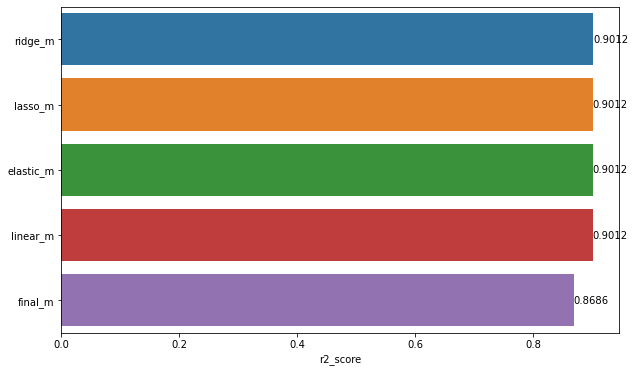

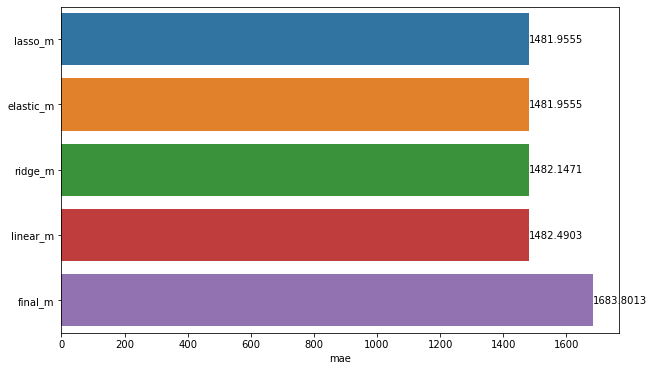

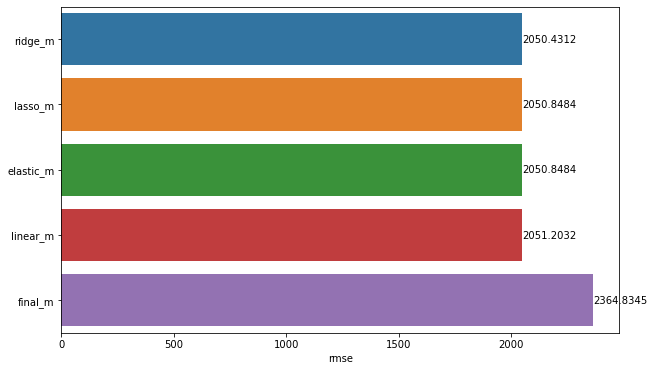

In [565]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");
# Müşteriye sunarken görselleştirme kullanabiliriz
# Final modelde tahminlerde biraz fark var